## The Data

** Source: https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75#!ds=22ox&display=line **

**Monthly milk production: pounds per cow. Jan 62 - Dec 75**

** Import numpy pandas and matplotlib **

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

** Use pandas to read the csv of the monthly-milk-production.csv file and set index_col='Month' **

In [2]:
milk = pd.read_csv('monthly-milk-production.csv',index_col='Month')

** Check out the head of the dataframe**

In [3]:
milk.head()

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0


** Make the index a time series by using: **

    milk.index = pd.to_datetime(milk.index)

In [4]:
milk.index = pd.to_datetime(milk.index)

** Plot out the time series data. **

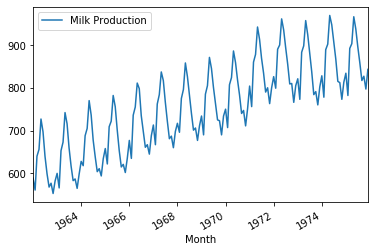

In [5]:
milk.plot()

### Train Test Split

** Let's attempt to predict a year's worth of data. (12 months or 12 steps into the future) **

** Create a test train split using indexing (hint: use .head() or tail() or .iloc[]). We don't want a random train test split, we want to specify that the test set is the last 12 months of data is the test set, with everything before it is the training. **

In [6]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 01:00:00 to 1975-12-01 01:00:00
Data columns (total 1 columns):
Milk Production    168 non-null float64
dtypes: float64(1)
memory usage: 2.6 KB


In [7]:
train_set = milk.head(156)

In [8]:
test_set = milk.tail(12)

In [9]:
test_set.shape

(12, 1)

### Scale the Data

** Use sklearn.preprocessing to scale the data using the MinMaxScaler. Remember to only fit_transform on the training data, then transform the test data. You shouldn't fit on the test data as well, otherwise you are assuming you would know about future behavior!**

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
train_scaled = scaler.fit_transform(train_set)

In [13]:
train_scaled.shape

(156, 1)

In [14]:
test_scaled = scaler.transform(test_set)

## Batch Function

** We'll need a function that can feed batches of the training data. We'll need to do several things that are listed out as steps in the comments of the function. Remember to reference the previous batch method from the lecture for hints. Try to fill out the function template below, this is a pretty hard step, so feel free to reference the solutions! **

In [15]:
def next_batch(training_data,batch_size,steps):
    """
    INPUT: Data, Batch Size, Time Steps per batch
    OUTPUT: A tuple of y time series results. y[:,:-1] and y[:,1:]
    """
    
    # STEP 1: Use np.random.randint to set a random starting point index for the batch.
    # Remember that each batch needs have the same number of steps in it.
    # This means you should limit the starting point to len(data)-steps
     
    # Grab a random starting point for each batch
    # rand_start = np.random.rand(0,len(training_data)-steps) 
    
    # STEP 2: Now that you have a starting index you'll need to index the data from
    # the random start to random start + steps + 1. Then reshape this data to be (1,steps+1)
    
    # y_batch = np.array(training_data[rand_start:rand_start+steps+1]).reshape(1,steps+1)
    
    # STEP 3: Return the batches. You'll have two batches to return y[:,:-1] and y[:,1:]
    # You'll need to reshape these into tensors for the RNN to .reshape(-1,steps,1)
    
    #return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1) 
    

In [16]:
def next_batch(training_data,batch_size,steps):
    
    
    # Grab a random starting point for each batch
    rand_start = np.random.randint(0,len(training_data)-steps) 

    # Create Y data for time series in the batches
    y_batch = np.array(training_data[rand_start:rand_start+steps+1]).reshape(1,steps+1)

    return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1) 

In [17]:
 # rand_start = np.random.rand(1,50)

In [18]:
# z=rand_start.reshape(-1, 50, 1) 

In [19]:
# z.shape

## Setting Up The RNN Model

** Import TensorFlow **

In [20]:
import tensorflow as tf

C:\Users\caiyi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\caiyi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\caiyi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\caiyi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

### The Constants

** Define the constants in a single cell. You'll need the following (in parenthesis are the values I used in my solution, but you can play with some of these): **
* Number of Inputs (1)
* Number of Time Steps (12)
* Number of Neurons per Layer (100)
* Number of Outputs (1)
* Learning Rate (0.03)
* Number of Iterations for Training (4000)
* Batch Size (1)

In [21]:
# Just one feature, the time series
num_inputs = 1
# Num of steps in each batch
num_time_steps = 12
# 100 neuron layer, play with this
num_neurons = 100
# Just one output, predicted time series
num_outputs = 1

## You can also try increasing iterations, but decreasing learning rate
# learning rate you can play with this
learning_rate = 0.03 
# how many iterations to go through (training steps), you can play with this
num_train_iterations = 4000
# Size of the batch of data
batch_size = 1

** Create Placeholders for X and y. (You can change the variable names if you want). The shape for these placeholders should be [None,num_time_steps-1,num_inputs] and [None, num_time_steps-1, num_outputs] The reason we use num_time_steps-1 is because each of these will be one step shorter than the original time steps size, because we are training the RNN network to predict one point into the future based on the input sequence.**  

In [22]:
X = tf.placeholder(tf.float32, [None, num_time_steps, num_inputs])
y = tf.placeholder(tf.float32, [None, num_time_steps, num_outputs])

** Now create the RNN Layer, you have complete freedom over this, use tf.contrib.rnn and choose anything you want, OutputProjectionWrappers, BasicRNNCells, BasicLSTMCells, MultiRNNCell, GRUCell etc... Keep in mind not every combination will work well! (If in doubt, the solutions used an Outputprojection Wrapper around a basic LSTM cell with relu activation.**

In [23]:
# create the RNN Layer
# Operator adding an output projection to the given cell
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicLSTMCell(num_units=num_neurons, activation=tf.nn.relu),
    output_size=num_outputs) 

W1229 01:18:07.326148 22436 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W1229 01:18:07.327147 22436 deprecation.py:323] From <ipython-input-23-e9eb39009437>:4: BasicLSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.


** Now pass in the cells variable into tf.nn.dynamic_rnn, along with your first placeholder (X)**

In [24]:
#Creates a recurrent neural network specified by RNNCell `cell`.
#cell output equals to the hidden state
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

W1229 01:18:09.281362 22436 deprecation.py:323] From <ipython-input-24-b7c0602b4056>:3: dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
W1229 01:18:09.425975 22436 deprecation.py:506] From C:\Users\caiyi\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1229 01:18:09.432958 22436 deprecation.py:506] From C:\Users\caiyi\Anaconda3\lib\site-packages\tensorflow\python\ops\rnn_cell_impl.py:738: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with 

### Loss Function and Optimizer

** Create a Mean Squared Error Loss Function and use it to minimize an AdamOptimizer, remember to pass in your learning rate. **

In [25]:
loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

** Initialize the global variables **

In [26]:
init = tf.global_variables_initializer()

** Create an instance of tf.train.Saver() **

In [27]:
saver = tf.train.Saver()

### Session

** Run a tf.Session that trains on the batches created by your next_batch function. Also add an a loss evaluation for every 100 training iterations. Remember to save your model after you are done training. **

In [28]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.9)

In [29]:
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    sess.run(init)
    
    for iteration in range(num_train_iterations):
        
        X_batch, y_batch = next_batch(train_scaled,batch_size,num_time_steps)
        sess.run(train, feed_dict={X: X_batch, y: y_batch})
        
        if iteration % 100 == 0:
            
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    # Save Model for Later
    saver.save(sess, "./ex_time_series_model")

0 	MSE: 0.11161088
100 	MSE: 0.024430232
200 	MSE: 0.010603187
300 	MSE: 0.010778082
400 	MSE: 0.010059003
500 	MSE: 0.008558051
600 	MSE: 0.010727409
700 	MSE: 0.012548541
800 	MSE: 0.012804199
900 	MSE: 0.01268365
1000 	MSE: 0.010782227
1100 	MSE: 0.009525776
1200 	MSE: 0.008547634
1300 	MSE: 0.011141892
1400 	MSE: 0.0120803835
1500 	MSE: 0.008446302
1600 	MSE: 0.011328855
1700 	MSE: 0.007857751
1800 	MSE: 0.008680037
1900 	MSE: 0.009198176
2000 	MSE: 0.009863274
2100 	MSE: 0.01190967
2200 	MSE: 0.012048788
2300 	MSE: 0.0066038244
2400 	MSE: 0.0047740825
2500 	MSE: 0.008620036
2600 	MSE: 0.0059313267
2700 	MSE: 0.0067601614
2800 	MSE: 0.010287126
2900 	MSE: 0.009954336
3000 	MSE: 0.006340151
3100 	MSE: 0.014801164
3200 	MSE: 0.007740767
3300 	MSE: 0.006785162
3400 	MSE: 0.0044393297
3500 	MSE: 0.008919134
3600 	MSE: 0.0050826385
3700 	MSE: 0.0036418263
3800 	MSE: 0.00427967
3900 	MSE: 0.0071624047


NotFoundError: Failed to create a NewWriteableFile: ./ex_time_series_model.data-00000-of-00001.tempstate17549180480283046912 : The system cannot find the path specified.
; No such process
	 [[node save/SaveV2 (defined at <ipython-input-27-416a2593f909>:1) ]]

Errors may have originated from an input operation.
Input Source operations connected to node save/SaveV2:
 rnn/output_projection_wrapper/basic_lstm_cell/bias/Adam_1 (defined at <ipython-input-25-7a96355b9f64>:3)	
 rnn/output_projection_wrapper/kernel (defined at C:\Users\caiyi\AppData\Local\Temp\tmpcm26l5dv.py:23)	
 rnn/output_projection_wrapper/basic_lstm_cell/bias (defined at C:\Users\caiyi\AppData\Local\Temp\tmpcm26l5dv.py:13)

Original stack trace for 'save/SaveV2':
  File "C:\Users\caiyi\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\caiyi\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\caiyi\Anaconda3\lib\asyncio\base_events.py", line 539, in run_forever
    self._run_once()
  File "C:\Users\caiyi\Anaconda3\lib\asyncio\base_events.py", line 1775, in _run_once
    handle._run()
  File "C:\Users\caiyi\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2854, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2880, in _run_cell
    return runner(coro)
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3057, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3248, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-27-416a2593f909>", line 1, in <module>
    saver = tf.train.Saver()
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 825, in __init__
    self.build()
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 837, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 875, in _build
    build_restore=build_restore)
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 505, in _build_internal
    save_tensor = self._AddSaveOps(filename_tensor, saveables)
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 206, in _AddSaveOps
    save = self.save_op(filename_tensor, saveables)
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 122, in save_op
    tensors)
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_io_ops.py", line 2059, in save_v2
    name=name)
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3616, in create_op
    op_def=op_def)
  File "C:\Users\caiyi\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


______

## Predicting Future (Test Data)

** Show the test_set (the last 12 months of your original complete data set) **

In [30]:
# CODE HERE
test_set

,Milk Production
Month,
1975-01-01 01:00:00,834.0
1975-02-01 01:00:00,782.0
1975-03-01 01:00:00,892.0
1975-04-01 01:00:00,903.0
1975-05-01 01:00:00,966.0
1975-06-01 01:00:00,937.0
1975-07-01 01:00:00,896.0
1975-08-01 01:00:00,858.0
1975-09-01 01:00:00,817.0


** Now we want to attempt to predict these 12 months of data, using only the training data we had. To do this we will feed in a seed training_instance of the last 12 months of the training_set of data to predict 12 months into the future. Then we will be able to compare our generated 12 months to our actual true historical values from the test set! **

# Generative Session
### NOTE: Recall that our model is really only trained to predict 1 time step ahead, asking it to generate 12 steps is a big ask, and technically not what it was trained to do! Think of this more as generating new values based off some previous pattern, rather than trying to directly predict the future. You would need to go back to the original model and train the model to predict 12 time steps ahead to really get a higher accuracy on the test data. (Which has its limits due to the smaller size of our data set)
** Fill out the session code below to generate 12 months of data based off the last 12 months of data from the training set. The hardest part about this is adjusting the arrays with their shapes and sizes. Reference the lecture for hints.**

In [53]:
with tf.Session() as sess:
    
    # Use your Saver instance to restore your saved rnn time series model
    saver.restore(sess, "./ex_time_series_model")

    # Create a numpy array for your genreative seed from the last 12 months of the 
    # training set data. Hint: Just use tail(12) and then pass it to an np.array
    train_seed = list(train_scaled[-12:])
    
    ## Now create a for loop that 
    for iteration in range(12):
        X_batch = np.array(train_seed[-num_time_steps:]).reshape(1, num_time_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        train_seed.append(y_pred[0, -1, 0])

** Show the result of the predictions. **

In [54]:
train_seed

[array([0.66105769]),
 array([0.54086538]),
 array([0.80769231]),
 array([0.83894231]),
 array([1.]),
 array([0.94711538]),
 array([0.85336538]),
 array([0.75480769]),
 array([0.62980769]),
 array([0.62259615]),
 array([0.52884615]),
 array([0.625]),
 0.6550163,
 0.6095896,
 0.82095337,
 0.8296561,
 0.9759759,
 0.9156034,
 0.8544792,
 0.78555226,
 0.69337934,
 0.7048185,
 0.64406914,
 0.71613586]

In [55]:
np.array(train_seed)

array([array([0.66105769]), array([0.54086538]), array([0.80769231]),
       array([0.83894231]), array([1.]), array([0.94711538]),
       array([0.85336538]), array([0.75480769]), array([0.62980769]),
       array([0.62259615]), array([0.52884615]), array([0.625]),
       0.6550163, 0.6095896, 0.82095337, 0.8296561, 0.9759759, 0.9156034,
       0.8544792, 0.78555226, 0.69337934, 0.7048185, 0.64406914,
       0.71613586], dtype=object)

In [56]:
outputs.shape

TensorShape([Dimension(None), Dimension(12), Dimension(1)])

** Grab the portion of the results that are the generated values and apply inverse_transform on them to turn them back into milk production value units (lbs per cow). Also reshape the results to be (12,1) so we can easily add them to the test_set dataframe.**

In [57]:
results = scaler.inverse_transform(np.array(train_seed[12:]).reshape(12,1))

In [58]:
results

array([[825.48676],
       [806.58923],
       [894.5166 ],
       [898.1369 ],
       [959.006  ],
       [933.891  ],
       [908.4634 ],
       [879.78973],
       [841.4458 ],
       [846.20447],
       [820.93274],
       [850.91254]], dtype=float32)

** Create a new column on the test_set called "Generated" and set it equal to the generated results. You may get a warning about this, feel free to ignore it.**

In [39]:
test_set['Generated'] = results

C:\Users\caiyi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


** View the test_set dataframe. **

In [40]:
test_set

,Milk Production,Generated
Month,,
1975-01-01 01:00:00,834.0,825.486755
1975-02-01 01:00:00,782.0,806.589233
1975-03-01 01:00:00,892.0,894.516602
1975-04-01 01:00:00,903.0,898.136902
1975-05-01 01:00:00,966.0,959.005981
1975-06-01 01:00:00,937.0,933.890991
1975-07-01 01:00:00,896.0,908.463379
1975-08-01 01:00:00,858.0,879.789734
1975-09-01 01:00:00,817.0,841.445801


** Plot out the two columns for comparison. **

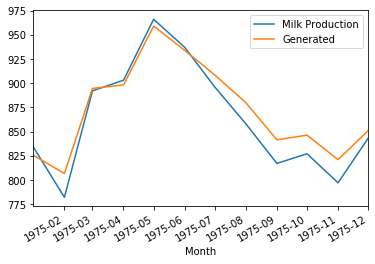

In [41]:
test_set.plot()

# Great Job!

Play around with the parameters and RNN layers, does a faster learning rate with more steps improve the model? What about GRU or BasicRNN units? What if you train the original model to not just predict one timestep ahead into the future, but 3 instead? Lots of stuff to add on here!